In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale


In [211]:
df_inmuebles=pd.read_csv('./inmuebles_bogota.csv')

#### Exploración Inicial del Dataset

In [212]:
#Ocho columnas con 9520 filas
df_inmuebles.shape

(9520, 8)

In [213]:
df_inmuebles.columns

Index(['Tipo', 'Descripcion', 'Habitaciones', 'Baños', 'Área', 'Barrio', 'UPZ',
       'Valor'],
      dtype='object')

In [214]:
#Cambio de nombres para facilitar los procesos siguientes.
columnas={'Baños':'Banos','Área':'Area','Valor':'Precio'}
df_inmuebles=df_inmuebles.rename(columns=columnas)
df_inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Precio
4061,Apartamento,Apartamento en venta en Bosa,3,1,42,Bosa,Bosa Central,$ 131.000.000
2515,Casa,Casa en venta en Rafael Uribe Uribe,6,4,191,Rafael Uribe Uribe,Los Alcázares,$ 500.000.000
2105,Apartamento,Apartamento en venta en Santa Barbara,2,2,66,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 430.000.000


In [215]:
#Sola la columna UPZ tiene valores faltantes y el tipo de dato en Precio es erróneo. 
df_inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Precio        9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


TRATAMIENTO DE DATOS

Valores Faltantes en UPZ

In [216]:
#Todos los UPZ faltantes son del Barrio Pasadena
df_inmuebles[ df_inmuebles['UPZ'].isnull()].sample(2)
#Buscando se encuentra que Pasadena pertenece a la "UPZ" 27: "La alhambra"

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Precio
6058,Apartamento,Apartamento en venta en Pasadena,2,2,71,Pasadena,NaN,$ 360.000.000
9415,Casa,Casa en venta en Pasadena,6,4,220,Pasadena,NaN,$ 1.170.000.000


In [217]:
#Se verifico si algún registro con Barrio Pasadena tenía su UPZ.
df_inmuebles[(df_inmuebles['Barrio'].str.strip() == 'Pasadena') & df_inmuebles['UPZ'].notnull()]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Precio


In [218]:
#Inmutando Datos Faltantes en UPZ
df_inmuebles['UPZ'].fillna('La Alhambra', inplace=True)

In [238]:
df_inmuebles['UPZ'].isnull().sum()

0

Tratando columna Precio: el dato en la columna precio es de tipo "object" y debe ser un float, así como se quitara los caracteres especiales. 

In [239]:
df_inmuebles['Precio'] = df_inmuebles['Precio'].str.replace('[$,. ]', '', regex=True)

In [240]:
df_inmuebles.head(1)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Precio
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,360000000


In [241]:
#Para un mejor manejo de datos se divide entre un millon al Precio. 
df_inmuebles['Precio_Millon'] = df_inmuebles['Precio'].astype(float)/1000000
df_inmuebles=df_inmuebles.drop(columns='Precio')
df_inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Precio_Millon
8639,Apartamento,Apartamento en venta en Zona Noroccidental,4,3,124,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,400.00
3881,Apartamento,Apartamento en venta en Fontibón,3,2,55,Fontibón,Fontibón,173.50
7943,Casa,Casa en venta en Bosa,5,3,240,Bosa,Bosa Central,375.00


Resumen estadístico de las columnas numéricas 

Se observan algunas discrepancias en los mínimos y máximos de las columnas: 
-Habitaciones
-Baños
-Area 

In [242]:
#Ajuste de decimales.
pd.set_option('display.precision',2)
pd.set_option('display.float_format',lambda x:'%.2f' % x)
df_inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


Se entiende que el area da sentido al número de habitaciones y de Baños, por lo que se comenzara por estudiar el area. 

#### Area

In [247]:
df_inmuebles.loc[df_inmuebles.Habitaciones > 6]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Precio_Millon
37,Apartamento,Apartamento en venta en Zona Noroccidental,32,2,63,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,290.50
67,Apartamento,Apartamento en venta en Zona Noroccidental,32,2,63,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,290.50
146,Casa,Casa en venta en Usaquén,7,4,325,Usaquén,Usaquén,1650.00
152,Casa,Casa en venta en Usaquén,7,4,325,Usaquén,Usaquén,1650.00
239,Casa,Casa en venta en Kennedy,14,7,360,Kennedy,Kennedy Central,1290.00
...,...,...,...,...,...,...,...,...
9493,Casa,Casa en venta en Barrios Unidos,8,6,247,Barrios Unidos,Los Andes,690.00
9499,Casa,Casa en venta en Puente Aranda,7,3,295,Puente Aranda,PUENTE ARANDA: Zona Industrial + Puente Aranda,780.00
9512,Casa,Casa en venta en Kennedy,7,4,270,Kennedy,Kennedy Central,615.00
9513,Casa,Casa en venta en San Luis,14,6,594,San Luis,Galerías,1200.00


UPZ= Son áreas urbanas más pequeñas que las localidades y más grandes que el barrio. La función de las UPZ es servir de unidades territoriales o sectores para planificar el desarrollo urbano en el nivel zonal. Son un instrumento de planificación para poder desarrollar una norma urbanística en el nivel de detalle que requiere Bogotá, debido a las grandes diferencias que existen entre unos sectores y otros

In [ ]:
df_inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tipo          9520 non-null   object 
 1   Descripcion   9520 non-null   object 
 2   Habitaciones  9520 non-null   int64  
 3   Banos         9520 non-null   int64  
 4   Area          9520 non-null   int64  
 5   Barrio        9520 non-null   object 
 6   UPZ           9478 non-null   object 
 7   Precio        9520 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 595.1+ KB


In [ ]:
df_inmuebles['UPZ'].unique().shape

(64,)

In [ ]:
df_inmuebles['Barrio'].unique().shape

(149,)

In [ ]:
df_inmuebles.Barrio.value_counts()

Usaquén               1105
Zona Noroccidental     877
Bosa                   589
Kennedy                589
Cedritos               554
                      ... 
Colinas De Suba          1
La Estanzuela            1
Roma                     1
Alameda                  1
Prado Veraniego          1
Name: Barrio, Length: 149, dtype: int64

In [ ]:
inmuebles_barrio=df_inmuebles.Barrio.value_counts()

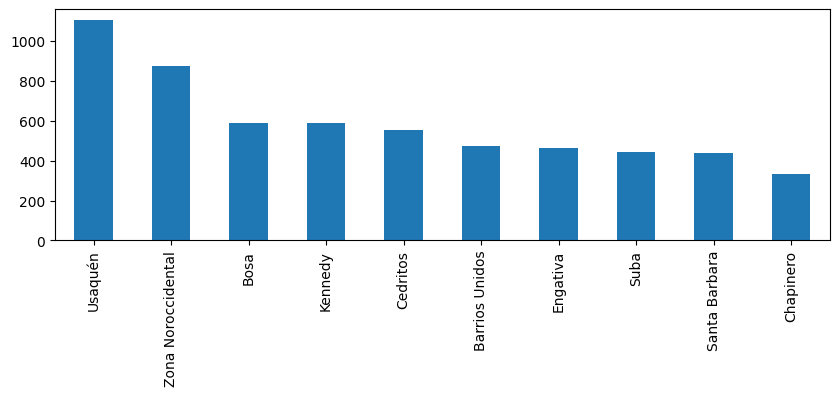

In [ ]:
fig, ax = plt.subplots(figsize=(10, 3))
inmuebles_barrio.head(10).plot.bar(x='Barrio', y='Valor', ax=ax)
plt.show()

1.- Promedio de area de todos los inmuebles en los barrios del dataframe.El top 10 de promedios. 
2.-Conteo, mediana, valor min, valor max. 

Barrios

In [ ]:
Barrios=(df_inmuebles['Barrio'].unique().tolist())

In [ ]:
barrios=[]
Area_promedio=[]
for bar in Barrios:
    barrios.append(bar)
    Area_promedio.append(df_inmuebles[df_inmuebles.Barrio==bar]['Area'].mean())

data = {'Barrio': barrios, 'Promedio Area (m2)': Area_promedio}
df_promedios_area = pd.DataFrame(data)
df_promedios_area = df_promedios_area.sort_values(by='Promedio Area (m2)', ascending=False)

In [ ]:
df_promedios_area.head(10)

,Barrio,Promedio Area (m2)
35,Modelia,4316.750000
124,Libertador,642.000000
119,Bosa Piamonte,400.000000
81,La Soledad,378.625000
106,Restrepo,336.500000
126,Santa Librada,328.000000
125,Las Ferias,320.000000
82,Santa Ana,309.375000
86,Veraguas,302.666667
84,Bellavista Occidental,286.200000


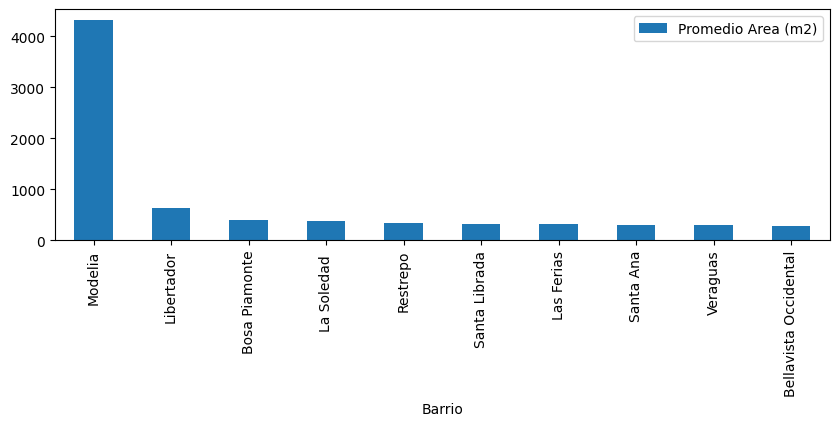

In [ ]:
fig, ax = plt.subplots(figsize=(10, 3))
df_promedios_area.head(10).plot.bar(x='Barrio', y='Promedio Area (m2)', ax=ax)
plt.show()

¿Que hay en Modelia? 

In [ ]:
df_inmuebles[df_inmuebles.Barrio=='Modelia'].describe()

,Habitaciones,Banos,Area,Precio
count,40.00000,40.000000,40.000000,40.000000
mean,3.67500,2.775000,4316.750000,705.469750
std,1.22762,0.973692,26259.427757,245.746372
min,2.00000,1.000000,48.000000,260.000000
25%,3.00000,2.000000,87.750000,544.997500
50%,3.00000,3.000000,155.500000,725.000000
75%,4.00000,3.000000,224.000000,852.500000
max,8.00000,6.000000,166243.000000,1200.000000


Valor atipico en el area 

In [ ]:
df_inmuebles[(df_inmuebles['Area'] > 224) & (df_inmuebles['Barrio'] == 'Modelia')]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Precio
1283,Casa,Casa en venta en Modelia,8,4,236,Modelia,Fontibón,1120.0
2147,Casa,Casa en venta en Modelia,5,4,320,Modelia,Fontibón,750.0
2257,Casa,Casa en venta en Modelia,5,4,244,Modelia,Fontibón,950.0
4913,Casa,Casa en venta en Modelia,5,4,320,Modelia,Fontibón,750.0
4914,Casa,Casa en venta en Modelia,5,4,320,Modelia,Fontibón,750.0
5059,Casa,Casa en venta en Modelia,7,6,287,Modelia,Fontibón,750.0
7073,Casa,Casa en venta en Modelia,4,3,166243,Modelia,Fontibón,850.0
7908,Casa,Casa en venta en Modelia,3,3,275,Modelia,Fontibón,850.0
8562,Casa,Casa en venta en Modelia,5,4,400,Modelia,Fontibón,950.0
9326,Casa,Casa en venta en Modelia,5,3,270,Modelia,Fontibón,1100.0


EDA

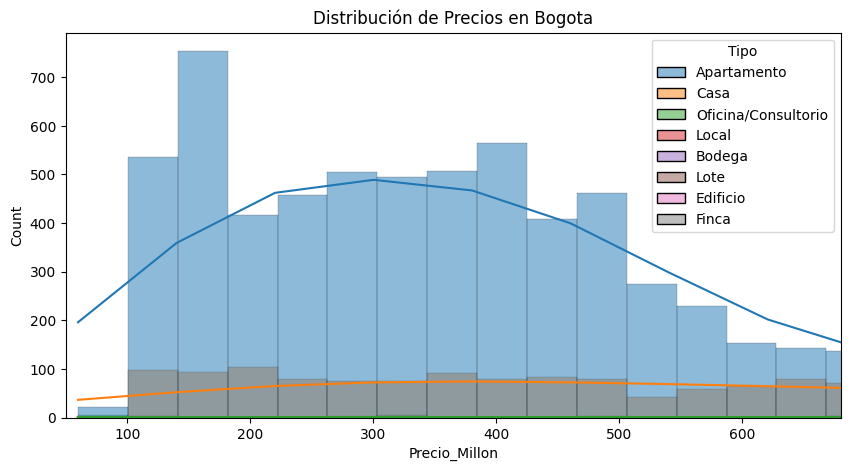

In [129]:
plt.figure(figsize=(10,5))
histograma=sns.histplot(data=df_inmuebles,x='Precio_Millon',kde=True,hue='Tipo')
histograma.set_title('Distribución de Precios en Bogota')
plt.xlim(50,680)
#plt.ylim(20,200)
#plt.savefig('Ruta',format='png')
plt.show()

2.-Top 3 tipos de inmuebles más interesantes. (Refinar el gráfico: Títulos,aumentar tamaños de labels, colores y conclusiones) 

3.-Precio del m2 por barrio (Gráfico adecuado)